# Load necessary packages and visualize main dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./listings-sea.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Question 1. What are the most popular neighborhoods and room types in the Seattle area?

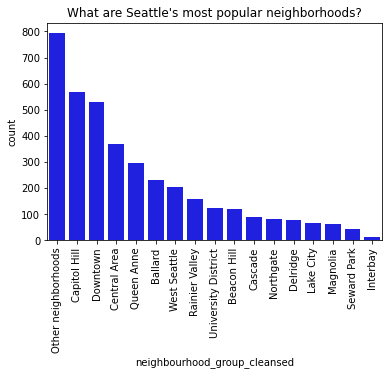

In [2]:
nbhd_vals = df.neighbourhood_group_cleansed.value_counts()
sns.countplot(data = df, x="neighbourhood_group_cleansed", order = nbhd_vals.index, color = 'blue' )
plt.xticks(rotation = 90);
plt.title("What are Seattle's most popular neighborhoods?");

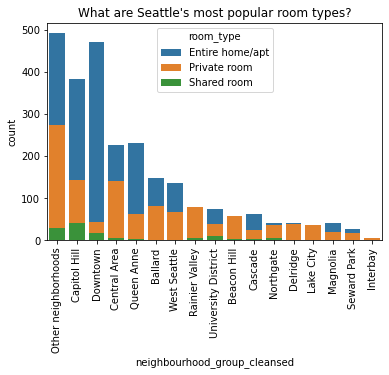

In [3]:
sns.countplot(data = df, x="neighbourhood_group_cleansed", hue="room_type", order = nbhd_vals.index, dodge = False)
plt.xticks(rotation = 90);
plt.title("What are Seattle's most popular room types?");

# Question 2. What are the price ranges of Seattle apartments by neighborhoods? What is the average daily rental price per month?

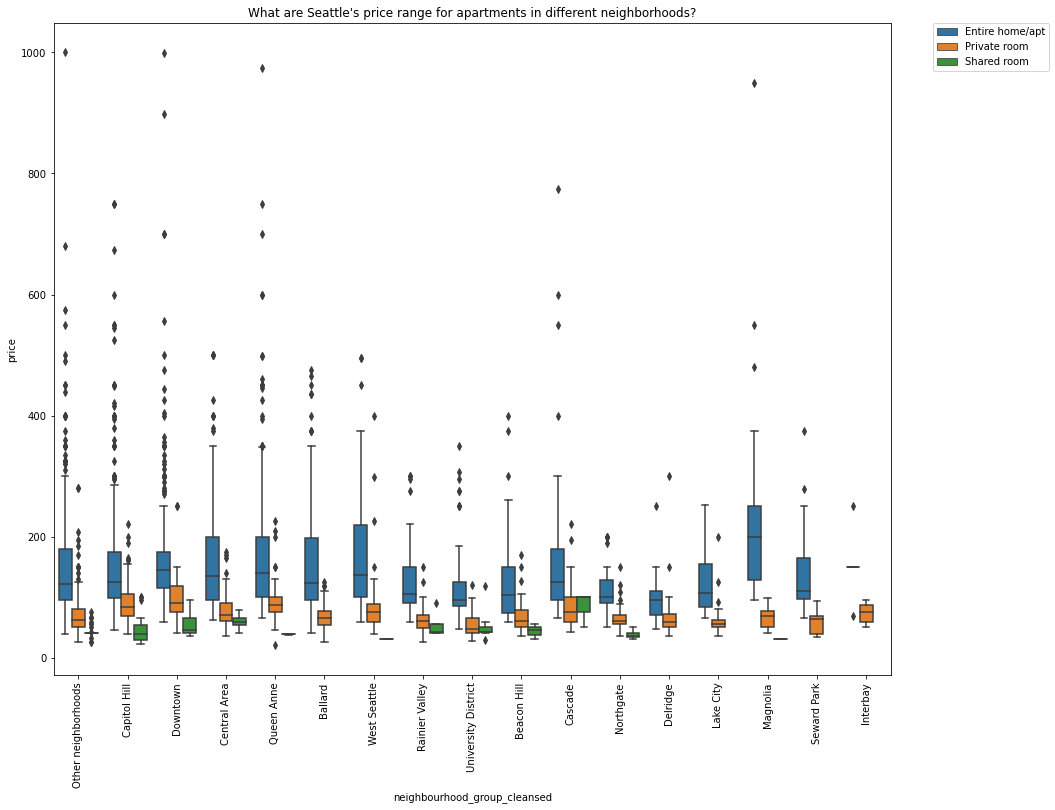

In [4]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(15,12))
sns.boxplot(data = df, x='neighbourhood_group_cleansed', y='price', hue='room_type', order = nbhd_vals.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 90);
plt.title("What are Seattle's price range for apartments in different neighborhoods?");

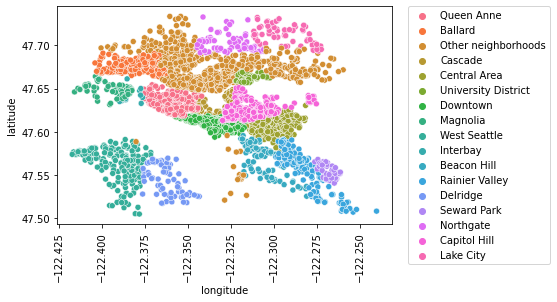

In [5]:
sns.scatterplot(data = df ,y = "latitude", x ="longitude", hue='neighbourhood_group_cleansed', palette = "husl")
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

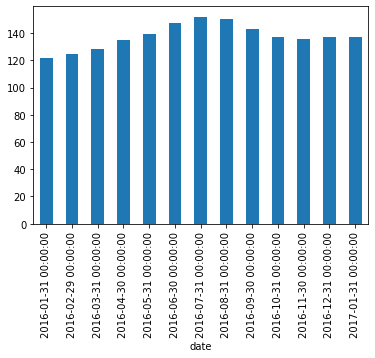

In [6]:
df2 = pd.read_csv('./calendar-sea.csv')
df2.date = pd.to_datetime(df2.date)
df2[df2.columns[-1]] = df2[df2.columns[-1]].replace('[\$,]', '', regex=True).astype(float)
df2.groupby(pd.Grouper(key='date', freq='1M'))['price'].mean().plot(kind = 'bar');

# Question 3. What is the vibe of each Seattle neighborhood?

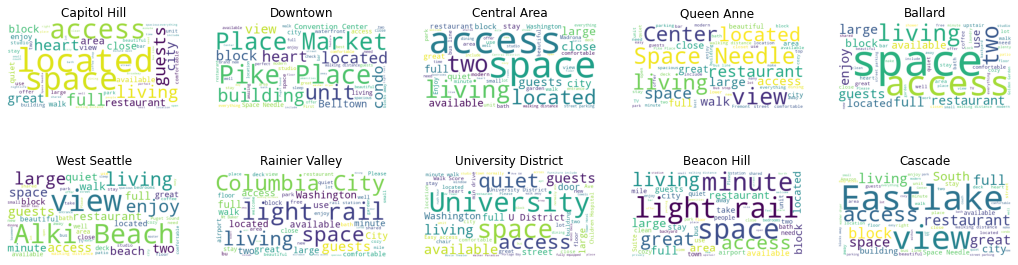

In [7]:
from wordcloud import WordCloud, STOPWORDS

fig, axs = plt.subplots(2,5, figsize=(18, 5), facecolor='w', edgecolor='k')
stop_words = ['private','guest','neighborhood','bed','one','Ballard','Lake','Union','bathroom','will',"downtown", "kitchen","apartment","West", "Beacon","Queen","Anne","Capitol","Hill", "Seattle", "home", "room",'house','bedroom'] + list(STOPWORDS)
axs = axs.ravel()

for i in range(10):
    df_select = df[df['neighbourhood_group_cleansed'] == nbhd_vals.index[i+1]]
    name = " ".join(str(w) for w in df_select.description)
    
    wordcloud = WordCloud(background_color='white',max_words=60, stopwords = stop_words).generate(name)
    axs[i].imshow(wordcloud)
    axs[i].set_title(nbhd_vals.index[i+1])
    axs[i].axis('off')